## Read the data

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_excel('madrid_rent_data.xlsx')

## Explore the data
df.head()

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Ciudad Lineal,Piso en Quintana,NaN,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0
3,4,Ciudad Lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0


## Get the data types

In [16]:
df.shape

(2089, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2089 non-null   int64  
 1   District      2089 non-null   object 
 2   Address       2089 non-null   object 
 3   Number        747 non-null    object 
 4   Area          2085 non-null   object 
 5   Rent          2089 non-null   int64  
 6   Bedrooms      2000 non-null   float64
 7   Sq.Mt         2089 non-null   int64  
 8   Floor         1948 non-null   float64
 9   Outer         1927 non-null   float64
 10  Elevator      1956 non-null   float64
 11  Penthouse     2089 non-null   int64  
 12  Cottage       2089 non-null   int64  
 13  Duplex        2089 non-null   int64  
 14  Semidetached  2089 non-null   int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 244.9+ KB


In [18]:
df.isna().sum()

Id                 0
District           0
Address            0
Number          1342
Area               4
Rent               0
Bedrooms          89
Sq.Mt              0
Floor            141
Outer            162
Elevator         133
Penthouse          0
Cottage            0
Duplex             0
Semidetached       0
dtype: int64

In [19]:
df = df.fillna(0)
df.sample(5)

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
2015,2111,Usera,Piso en calle Antonio Prieto,0,ZofÁ­o,725,2.0,55,3.0,1.0,0.0,0,0,0,0
1151,1203,Centro,Piso en calle Miguel Servet,4,Lavapiés-Embajadores,900,1.0,35,1.0,0.0,0.0,0,0,0,0
1655,1728,Chamberí,Piso en Almagro,0,Almagro,4300,4.0,355,3.0,1.0,1.0,0,0,0,0
766,809,Salamanca,Piso en calle General Pardiñas,48,Goya,1400,1.0,75,2.0,1.0,1.0,0,0,0,0
1998,2093,Tetuán,Ático en calle General Varela,11,Cuatro Caminos,950,0.0,36,5.0,1.0,1.0,1,0,0,0


## Data Preprocessing

In [20]:
df = pd.get_dummies(df, columns=['District'], drop_first=True)
df = pd.get_dummies(df, columns=['Area'], drop_first=True)

In [21]:
df.sample(5)

,Id,Address,Number,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,...,Area_ZofÁ­o,Area_chalet independiente en Nueva España,Area_en Almagro,Area_en Ciudad Jardín,Area_en El Viso,Area_en Nueva España,Area_en Nuevos Ministerios-Ríos Rosas,Area_en Trafalgar,Area_plaza de España,Area_Águilas
1348,1411,Piso en calle alondra,3,590,2.0,60,1.0,1.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
439,464,Piso en plaza de españa,18,2970,2.0,90,10.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,False,False
2017,2114,Piso en calle De Silvio Abad,0,575,2.0,65,3.0,1.0,1.0,0,...,True,False,False,False,False,False,False,False,False,False
120,124,Piso en Pedro Rico,0,1900,4.0,165,6.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,False,False
1448,1516,Piso en El Viso,0,2700,2.0,90,6.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,False,False


##### Feature Engineering

In [52]:
# To avoid corr between bedrooms and sqmts
df['sqm_per_bedroom'] = df.apply(lambda row: row['Sq.Mt'] / row['Bedrooms'] if row['Bedrooms'] != 0 else 0, axis=1)

# Space to create more features if needed

##### Splitting the data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

X = df.drop(['Id', 'Address', 'Number', 'Rent',
            'District_Barajas', 'District_Villa de Vallecas', # Dropping some districts to avoid correlation with areas e.g. Retiro and Ibiza
            'District_San Blás', 'District_Retiro',
            'Sq.Mt', ], axis=1)


y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ['sqm_per_bedroom', 'Bedrooms', 'Floor', 'Outer', 'Elevator', 'Penthouse']
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_cols)],
    remainder='passthrough'
)
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [24]:
threshold = 0.66
corr_matrix = X.corr()

# Get pairs
corr_pairs = (
    corr_matrix
    .abs()
    .where(lambda x: x > threshold) # Filter by threshold
    .stack()                        # Convert to Series with MultiIndex
    .reset_index()
)

corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Remove self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable_1'] != corr_pairs['Variable_2']]
corr_pairs = corr_pairs[corr_pairs['Variable_1'] < corr_pairs['Variable_2']]  # Keep only one of each pair

# Sort by absolute correlation
corr_pairs = corr_pairs.sort_values('Correlation', ascending=False).reset_index(drop=True)
corr_pairs

,Variable_1,Variable_2,Correlation


## Segmentation

In [47]:
from sklearn.cluster import KMeans

# Fit KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

X_train['cluster'] = clusters
X_train['cluster'].unique()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


array([0, 1, 3, 2])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

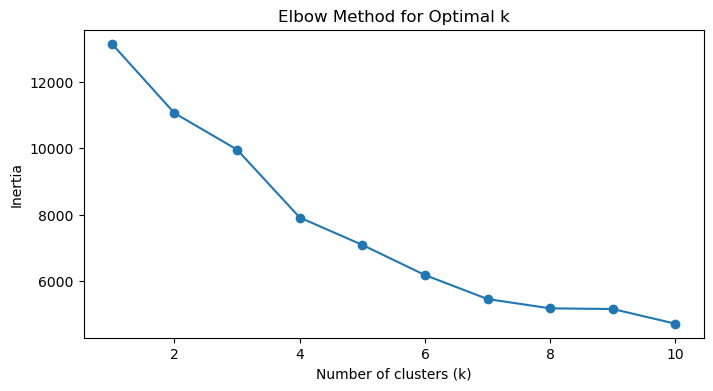

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [49]:
from sklearn.metrics import silhouette_score

# Use your fitted clusters
score = silhouette_score(X_train_scaled, clusters)
print(f"Silhouette score for k={n_clusters}: {score:.3f}")

Silhouette score for k=4: 0.356
